# Weather Plotting #

## Import libraries ##

In [91]:
# Import the libraries required for this assignment
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Read and summarize the raw data ##

In [92]:
# File is saved under data folder within the repo. Set filename variable.
FILENAME= "weatherreadings1.csv"

# Read csv into pandas data frame, pointing to relative path of file.
df = pd.read_csv("data/"+FILENAME)

# Produce initial (truncated) view of the Data Frame
df

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:00:00+00:00,2024-10-03T14:00:00+00:00,1,True,True,1,WeatherLink,335,77.8,...,False,-8.8545,53.5244,45,202410034sie5kcbthe69kyhyyguw31uhh,2024-10-03T14:00:00+00:00,1000013318,2024-10-03T14:00:25.2118092+00:00,1,12578832191
85,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:15:00+00:00,2024-10-03T14:15:00+00:00,1,True,True,1,WeatherLink,14,77.2,...,False,-8.8545,53.5244,45,202410037edh3yhb1re69kyhyyguw31uhh,2024-10-03T14:15:00+00:00,1000013318,2024-10-03T14:15:20.6677085+00:00,1,12578846874
86,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:30:00+00:00,2024-10-03T14:30:00+00:00,1,True,True,1,WeatherLink,354,76.9,...,False,-8.8545,53.5244,45,20241003b396uzhb1oe69kyhyytrtenn4a,2024-10-03T14:30:00+00:00,1000013318,2024-10-03T14:30:45.6588747+00:00,1,12578862046
87,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03T14:45:00+00:00,2024-10-03T14:45:00+00:00,1,True,True,1,WeatherLink,307,76.5,...,False,-8.8545,53.5244,45,20241003m16wydcb1ae69kyhyytrtenn4a,2024-10-03T14:45:00+00:00,1000013318,2024-10-03T14:47:10.3227765+00:00,1,12578876749


In [93]:
# Provide general summary of Data Frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

## Initial Observations ##

1. The data is clean: no blank values or NaNs.

2. The data contains weather readings from 16:15, Oct 2nd 2024 to 15:00 Oct 3rd 2024 (22 hour 45 minute time horizon).

3. Time intervals on the weather readings are 15 minutes. There should be 91 readings in total (22 * 4 + 3). We have 89 on record so two readings are missing.

4. Some of the time stamped data appear to be duplicates (`reportStartDateTime`,`reportEndDateTime` and `localReportEndDateTime`). Two of these columns could be dropped without losing information on the data.

## Data Cleaning ##

The data is timestamped. Set `reportStartDateTime` as dtype = datetime and re-index the DataFrame on `reportStartDateTime`.

In [94]:
# Convert 'reportStartDateTime' dtype: object to dtype: datetime using to_datetime
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'])

# Set 'reportStartDateTime' as the index of DataFrame, to assist with analysis later on.
df.set_index('reportStartDateTime', inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2024-10-02 16:15:00+00:00 to 2024-10-03 15:00:00+00:00
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportEndDateTime               89 non-null     object 
 2   collectionName                  89 non-null     int64  
 3   isPublic                        89 non-null     bool   
 4   isLatestVersion                 89 non-null     bool   
 5   observationType                 89 non-null     int64  
 6   softwareType                    89 non-null     object 
 7   windDirection                   89 non-null     int64  
 8   relativeHumidity                89 non-null     float64
 9   windSpeed_MilePerHour           89 non-null     float64
 10  windSpeed_MetrePerSecond        89 non-null     float64
 11  dryBulbTemperature_Fahrenheit   89 non-null     f

## Temperature Plotting ##

In [95]:
# Check the plot styles available in matplotlib.plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


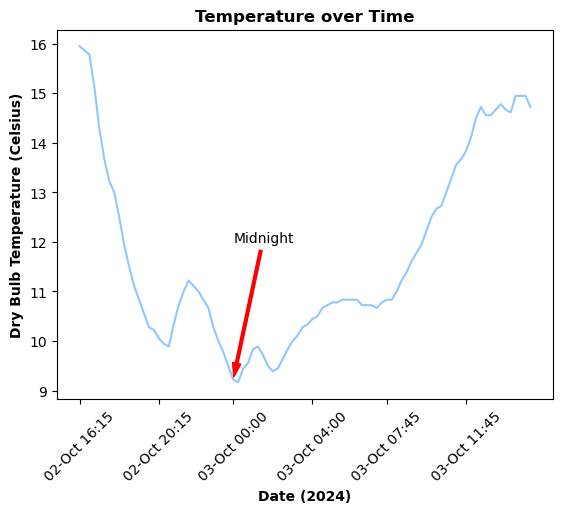

In [96]:
# Plot the Temperature

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Temperature over Time', weight='bold')

# Set x and y variables to be plotted
x = df.index
y = df['dryBulbTemperature_Celsius']

# Axis labels.
ax.set_xlabel('Date (2024)', weight='bold')
ax.set_ylabel('Dry Bulb Temperature (Celsius)', weight ='bold')

# x-axis ticks
# https://stackoverflow.com/questions/50128668/how-to-adjust-tick-frequency-for-string-x-axis#:~:text=One%20way%20you%20can%20do%20this%20is%20to,every%202nd%20entry%20using%20the%20slice%20notation%20%5B%3A%3A2%5D.
ax.set_xticks(x[::15])
ax.set_xticklabels(x[::15], rotation=45)

# Set date format on x-axis
# https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H:%M'))

# Annotations
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
# https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/plotting-time-series?ex=9

ax.annotate("Midnight", 
            xy=(pd.Timestamp("2024-10-03"),9.22),
            xytext=(pd.Timestamp("2024-10-03"),12),
            arrowprops=dict(arrowstyle = 'simple, head_length = 1, head_width = .6', color = 'red'))

# Generate plot
ax.plot(y)

## End ##